# Importing Libraries and Processed Survey Data

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as skd
import statsmodels as sm
!pip install plotly==5.15.0
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
# read processed survey data
df_eda_syn = pd.read_excel('../../data/processed/subgroup_a_question_2_train.xlxs')
df_eda_syn.head()
df_eda_syn.columns.tolist()

['Survey_ID',
 'Age',
 'Gender',
 'Tourist/Local',
 'USS companion [Children]',
 'USS companion [Family]',
 'USS companion [Friends]',
 'USS companion [Significant other]',
 'Visiting frequency',
 'Visiting occasion [Free tickets]',
 'Visiting occasion [Public holiday]',
 'Visiting occasion [School holiday]',
 'Visiting occasion [School/work event]',
 'Visiting occasion [Special events]',
 'Visiting occasion [Special occasion]',
 'Visiting occasion [Weekdays]',
 'Visiting occasion [Weekends]',
 'Attractive factors [Food options]',
 'Attractive factors [Types of rides available]',
 'Attractive factors [Gift shops]',
 'Attractive factors [Special events (e.g. Halloween Horror Night)]',
 'Attractive factors [Accessibility]',
 'Seasonal pass [Frequent visitor to USS]',
 'Seasonal pass [Bundle price]',
 'Seasonal pass [Eligibility during a holiday period]',
 'Time enter',
 'Time leave',
 'Rating experience',
 'Improve experience [Short wait times]',
 'Improve experience [Lack of crowds]',
 

In [ ]:
def print_category_distributions(df):
    # Iterate over each column in the DataFrame
    for col in df.columns:
        if pd.api.types.is_integer_dtype(df[col]):  # Include integer-based categorical columns
            print(f"Distribution for column: {col}")
            print(df[col].value_counts(normalize=True) * 100)  # Normalize for percentage
            print("\n" + "-"*40 + "\n")

# Example usage with your DataFrame
print_category_distributions(df_eda_syn)

Distribution for column: Survey_ID
Survey_ID
1       0.013816
4808    0.013816
4834    0.013816
4833    0.013816
4832    0.013816
          ...   
2409    0.013816
2408    0.013816
2407    0.013816
2406    0.013816
7238    0.013816
Name: proportion, Length: 7238, dtype: float64

----------------------------------------

Distribution for column: Age
Age
2    25.241779
1    25.062172
3    20.489085
4    17.656811
5    11.550152
Name: proportion, dtype: float64

----------------------------------------

Distribution for column: Gender
Gender
1    51.271069
2    48.728931
Name: proportion, dtype: float64

----------------------------------------

Distribution for column: Tourist/Local
Tourist/Local
2    63.746891
1    36.253109
Name: proportion, dtype: float64

----------------------------------------

Distribution for column: USS companion [Children]
USS companion [Children]
0    91.751865
1     8.248135
Name: proportion, dtype: float64

----------------------------------------

Distribut

# Demographics and Visiting Profiles

## Bar Charts of the Distribution of Age, Gender, Tourist/Local and Visiting frequency

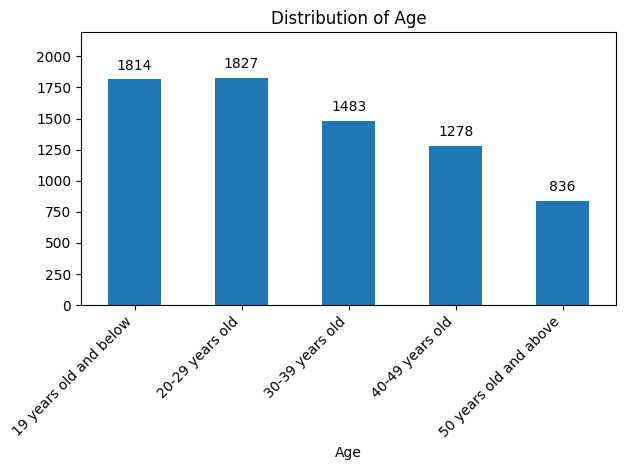

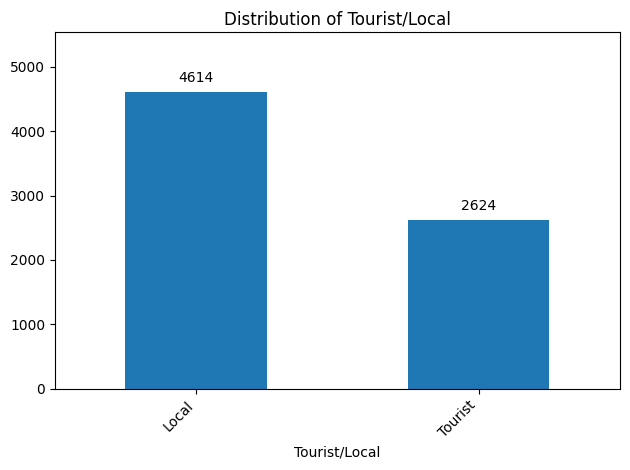

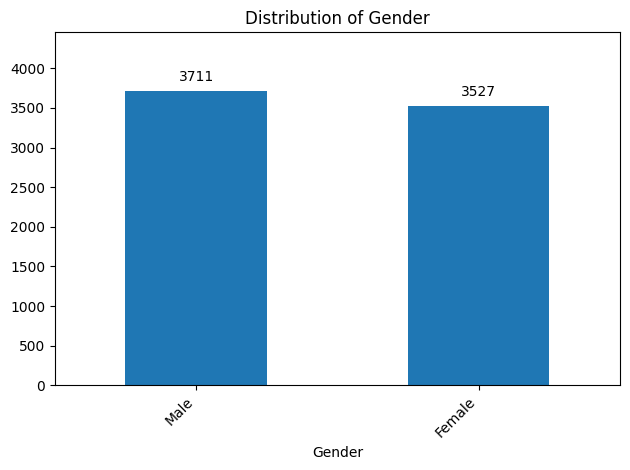

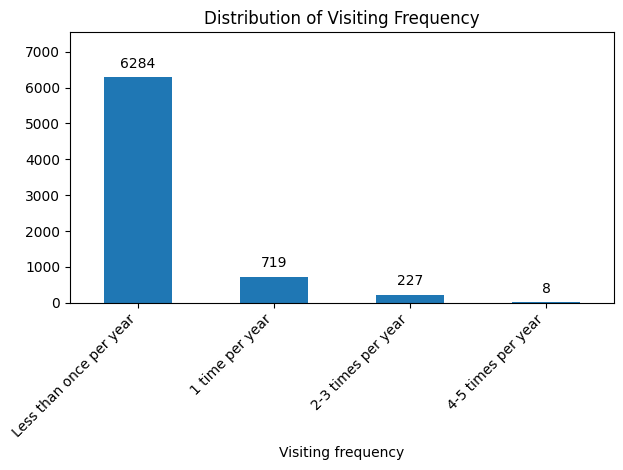

In [ ]:
categorical_cols = ['Age', 'Gender', 'Tourist/Local', 'Visiting frequency']

age_mapping = {
    1: '19 years old and below',
    2: '20-29 years old',
    3: '30-39 years old',
    4: '40-49 years old',
    5: '50 years old and above'
}

tourist_local_mapping = {
    1: 'Tourist',
    2: 'Local'
}

gender_mapping = {
    1: 'Male',
    2: 'Female'
}

visiting_frequency_mapping = {
    1: 'Less than once per year',
    2: '1 time per year',
    3: '2-3 times per year',
    4: '4-5 times per year',
    5: 'More than 5 times per year'
}

mapping_dict = {
    'Age': age_mapping,
    'Tourist/Local': tourist_local_mapping,
    'Gender': gender_mapping,
    'Visiting Frequency': visiting_frequency_mapping
}

# AGE
age_order = [1, 2, 3, 4, 5]
age_counts = df_eda_syn['Age'].value_counts().sort_index()
# plt.figure(figsize=(12, 8))
ax = age_counts.plot(kind='bar')
ax.set_xticklabels([age_mapping.get(int(label.get_text()), label.get_text()) for label in ax.get_xticklabels()])
plt.title('Distribution of Age')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, age_counts.max() * 1.2)  # Adjusting y-axis to be 20% higher than max value
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# TOURIST/LOCAL
# plt.figure(figsize=(12, 8))
ax = df_eda_syn['Tourist/Local'].value_counts().plot(kind='bar')

ax.set_xticklabels([tourist_local_mapping.get(int(label.get_text()), label.get_text()) for label in ax.get_xticklabels()])
plt.title('Distribution of Tourist/Local')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df_eda_syn['Tourist/Local'].value_counts().max() * 1.2)  # Adjusting y-axis to be 20% higher than max value
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# GENDER
# plt.figure(figsize=(12, 8))
ax = df_eda_syn['Gender'].value_counts().plot(kind='bar')

ax.set_xticklabels([gender_mapping.get(int(label.get_text()), label.get_text()) for label in ax.get_xticklabels()])
plt.title('Distribution of Gender')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df_eda_syn['Gender'].value_counts().max() * 1.2)  # Adjusting y-axis to be 20% higher than max value
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

# VISITING FREQUENCY
# plt.figure(figsize=(12, 8))
ax = df_eda_syn['Visiting frequency'].value_counts().plot(kind='bar')

ax.set_xticklabels([visiting_frequency_mapping.get(int(label.get_text()), label.get_text()) for label in ax.get_xticklabels()])

plt.title('Distribution of Visiting Frequency')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df_eda_syn['Visiting frequency'].value_counts().max() * 1.2)  # Adjusting y-axis to be 20% higher than max value
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Bar Chart of Visitors' Companions to USS

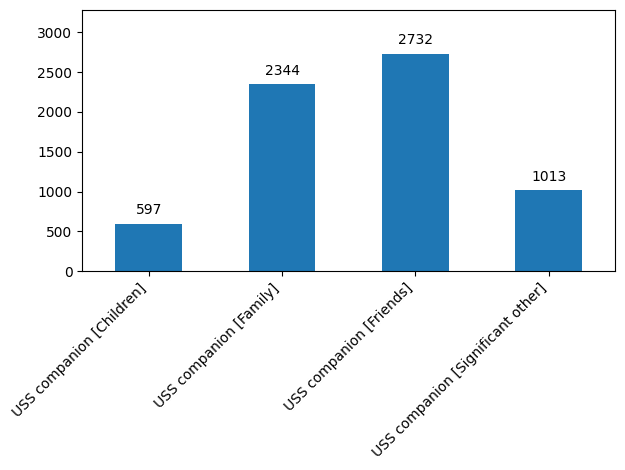

In [ ]:
selected_columns = df_eda_syn.iloc[:, 4:8]

frequencies_1s = {}

for column in selected_columns.columns:
    frequencies_1s[column] = selected_columns[column].eq(1).sum()

freq_1s_df = pd.DataFrame.from_dict(frequencies_1s, orient='index', columns=['Frequency'])

ax = freq_1s_df.plot(kind='bar', y='Frequency', legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, freq_1s_df['Frequency'].max() * 1.2)  # Adjusting y-axis to be 20% higher than max value
plt.tight_layout()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Bar Chart of Visiting Occasion

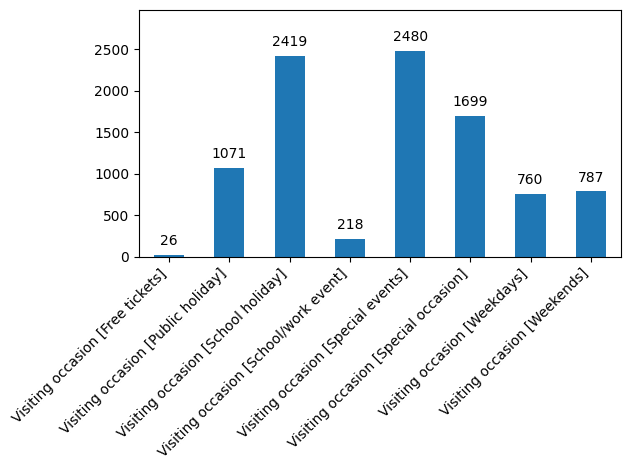

In [ ]:
selected_columns = df_eda_syn.iloc[:, 9:17]

frequencies_1s = {}

for column in selected_columns.columns:
    frequencies_1s[column] = selected_columns[column].eq(1).sum()

freq_1s_df = pd.DataFrame.from_dict(frequencies_1s, orient='index', columns=['Frequency'])

ax = freq_1s_df.plot(kind='bar', y='Frequency', legend=False)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, freq_1s_df['Frequency'].max() * 1.2)  # Adjusting y-axis to be 20% higher than max value
plt.tight_layout()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## Companion Preference by Age Group

<Figure size 1200x1200 with 0 Axes>

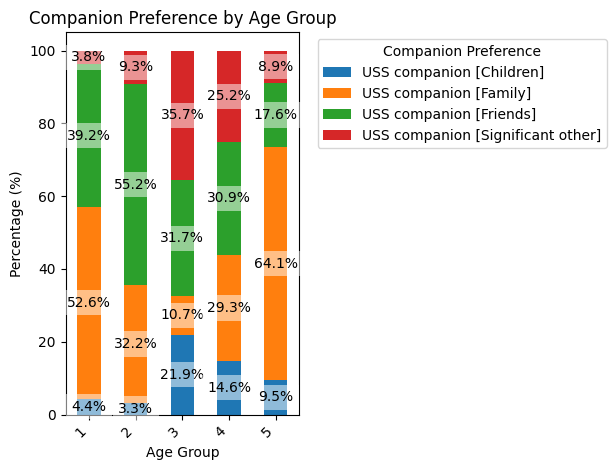

In [ ]:
companion_cols = df_eda_syn.iloc[:, 4:8]

melted_sd = pd.melt(df_eda_syn, id_vars=['Age'], value_vars=companion_cols,
                     var_name='Companion Preference', value_name='Selected')

melted_sd = melted_sd[melted_sd['Selected'] == 1]

companion_by_age = melted_sd.groupby('Age')['Companion Preference'].value_counts().unstack()

companion_percentages = companion_by_age.div(companion_by_age.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 12))
ax = companion_percentages.plot(kind='bar', stacked=True)

for i in range(len(companion_percentages)):
    cum_height = 0
    for companion in companion_percentages.columns:
        height = companion_percentages.iloc[i][companion]
        if height > 0:
            percentage = round(height, 1)
            ax.text(i, cum_height + height / 2, f"{percentage:.1f}%", ha='center', va='center', color='black', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
            cum_height += height
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.title('Companion Preference by Age Group')

plt.legend(title='Companion Preference', bbox_to_anchor=(1.05, 1), loc='upper left')

age_group_labels = companion_percentages.index.astype(str).tolist()  # Convert index to string labels
plt.xticks(rotation=45, ha='right')
plt.xticks(range(len(age_group_labels)), age_group_labels)
plt.tight_layout()
plt.show()


# Attraction Preferences and Appeal

## Attractive factors of USS

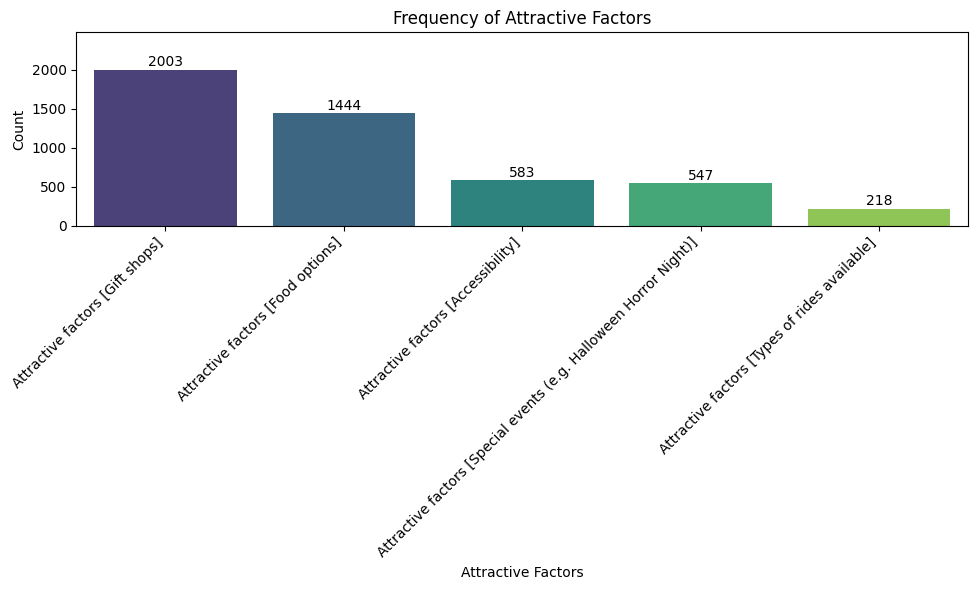

In [ ]:
attractive_factor_cols = [
    'Attractive factors [Food options]',
    'Attractive factors [Types of rides available]',
    'Attractive factors [Gift shops]',
    'Attractive factors [Special events (e.g. Halloween Horror Night)]',
    'Attractive factors [Accessibility]'
]

# Melt the DataFrame to combine attractive factor columns
melted_sd = pd.melt(df_eda_syn, id_vars=['Age'], value_vars=attractive_factor_cols,
                    var_name='Attractive Factor', value_name='Selected')

# Filter for selected attractive factors (where 'Selected' is 1)
melted_sd = melted_sd[melted_sd['Selected'] == 1]

# Calculate frequency count of each attractive factor
attractive_factor_counts = melted_sd['Attractive Factor'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=attractive_factor_counts.index, y=attractive_factor_counts.values, palette="viridis", hue=attractive_factor_counts.index, dodge=False, legend=False)

# Add counts on top of each bar
for i, count in enumerate(attractive_factor_counts.values):
    ax.text(i, count + 5, f'{int(count)}', ha='center', va='bottom')

# Set labels and title
plt.title('Frequency of Attractive Factors')
plt.xlabel('Attractive Factors')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, freq_1s_df['Frequency'].max() * 1)

# Show the plot
plt.tight_layout()
plt.show()

## Table of Mean Experience and Likelihood of Return to USS, grouped by gender, tourist/local and age group

In [ ]:
grouped_data = df_eda_syn.groupby(['Gender', 'Tourist/Local', 'Age'])[['Rating experience', 'Likelihood of return [General]']].mean()

grouped_data = grouped_data.reset_index()  # Reset index to access 'Gender' as a column
grouped_data['Gender'] = grouped_data['Gender'].replace({1: 'Male', 2: 'Female'})
grouped_data['Tourist/Local'] = grouped_data['Tourist/Local'].replace({1: 'Tourist', 2: 'Local'})
grouped_data['Age'] = grouped_data['Age'].replace({1: '19 years old and below',
                                                               2: '20-29 years old',
                                                               3: '30-39 years old',
                                                               4: '40-49 years old',
                                                               5: '50 years old and above'})
grouped_data = grouped_data.set_index(['Gender', 'Tourist/Local', 'Age'])  # Set index back


grouped_data

Rating experience  \
Gender Tourist/Local Age                                         
Male   Tourist       19 years old and below           3.876596   
                     20-29 years old                  3.494253   
                     30-39 years old                  3.906077   
                     40-49 years old                  3.165644   
       Local         19 years old and below           3.750000   
                     20-29 years old                  3.796954   
                     30-39 years old                  3.491525   
                     40-49 years old                  3.663212   
                     50 years old and above           3.696078   
Female Tourist       19 years old and below           3.494505   
                     20-29 years old                  4.132653   
                     30-39 years old                  3.000000   
                     40-49 years old                  2.000000   
       Local         19 years old and below           3.819820   
                     20-29 years old                  3.819672   
                     30-39 years old                  3.700000   
                     40-49 years old                  3.539130   
                     50 years old and above           3.677215   

                                             Likelihood of return [General]  
Gender Tourist/Local Age                                                     
Male   Tourist       19 years old and below                        2.969149  
                     20-29 years old                               3.091954  
                     30-39 years old                               2.925414  
                     40-49 years old                               2.871166  
       Local         19 years old and below                        3.193548  
                     20-29 years old                               3.238579  
                     30-39 years old                               3.216949  
                     40-49 years old                               3.103627  
                     50 years old and above                        2.696078  
Female Tourist       19 years old and below                        3.351648  
                     20-29 years old                               2.627551  
                     30-39 years old                               2.000000  
                     40-49 years old                               2.000000  
       Local         19 years old and below                        3.252252  
                     20-29 years old                               3.319672  
                     30-39 years old                               3.214286  
                     40-49 years old                               3.373913  
                     50 years old and above                        2.873418

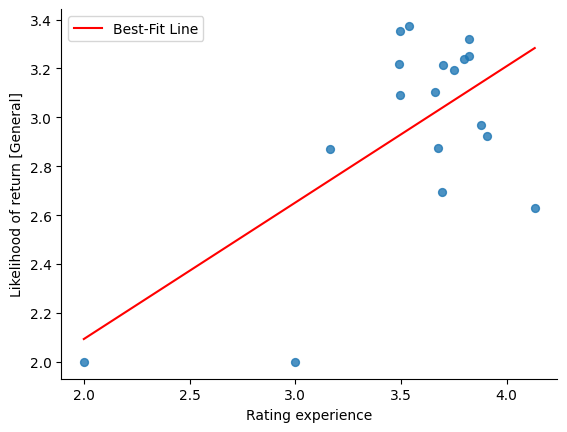

In [ ]:
# @title Rating experience vs Likelihood of return

grouped_data.plot(kind='scatter', x='Rating experience', y='Likelihood of return [General]', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

x = grouped_data['Rating experience'].values
y = grouped_data['Likelihood of return [General]'].values

# Calculate coefficients and generate line points (same as before)
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = polynomial(x_line)

# Add the best-fit line to the plot
plt.plot(x_line, y_line, color='red', label='Best-Fit Line')
plt.legend()
plt.show()

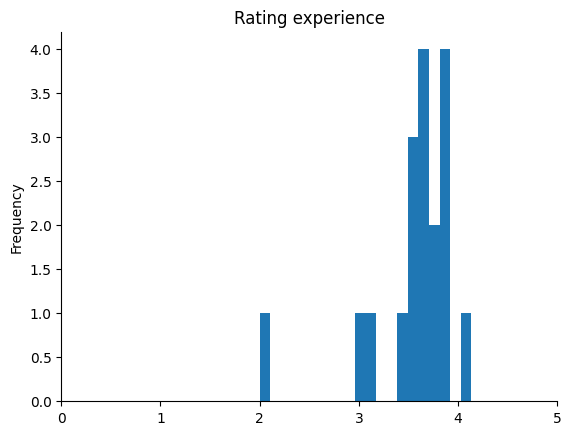

In [ ]:

# Plot histogram for 'Rating experience'
grouped_data['Rating experience'].plot(kind='hist', bins=20, title='Rating experience')

# Set the x-axis limits to be between 0 and 5
plt.xlim(0, 5)

# Remove top and right spines for cleaner visualization
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()

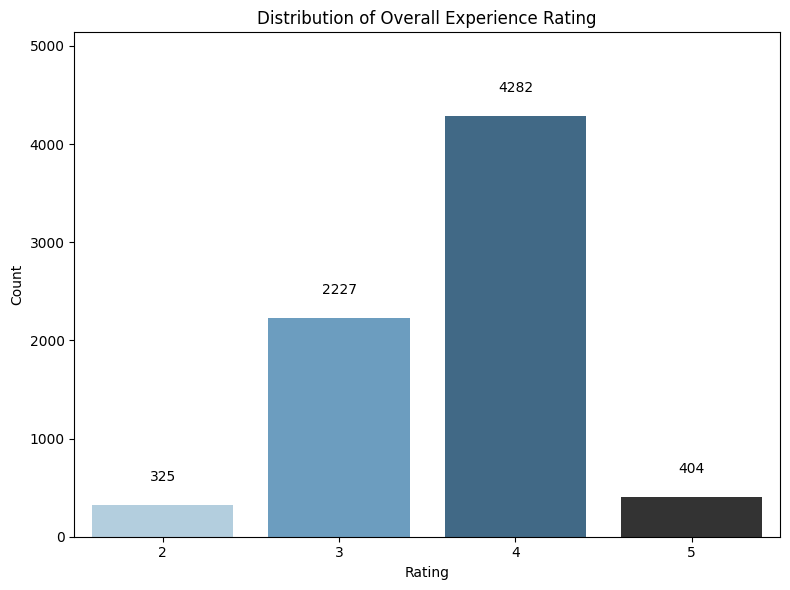

In [ ]:
# Calculate the value counts for the 'Rating experience' column
rating_counts = df_eda_syn['Rating experience'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues_d", hue=rating_counts.index)

# Add counts on top of each bar with some offset
for i, count in enumerate(rating_counts.values):
    ax.text(i, count + 0.05 * rating_counts.values.max(),  # Position the text slightly above each bar
            f'{int(count)}', ha='center', va='bottom')

# Set labels and title
plt.title('Distribution of Overall Experience Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.ylim(0, rating_counts.values.max() * 1.2)  # Increase the upper limit of y-axis slightly for text

# Hide the automatically added legend
ax.get_legend().remove()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()

## Heatmap of Average Appeal Score for Each Attraction, by Age Group

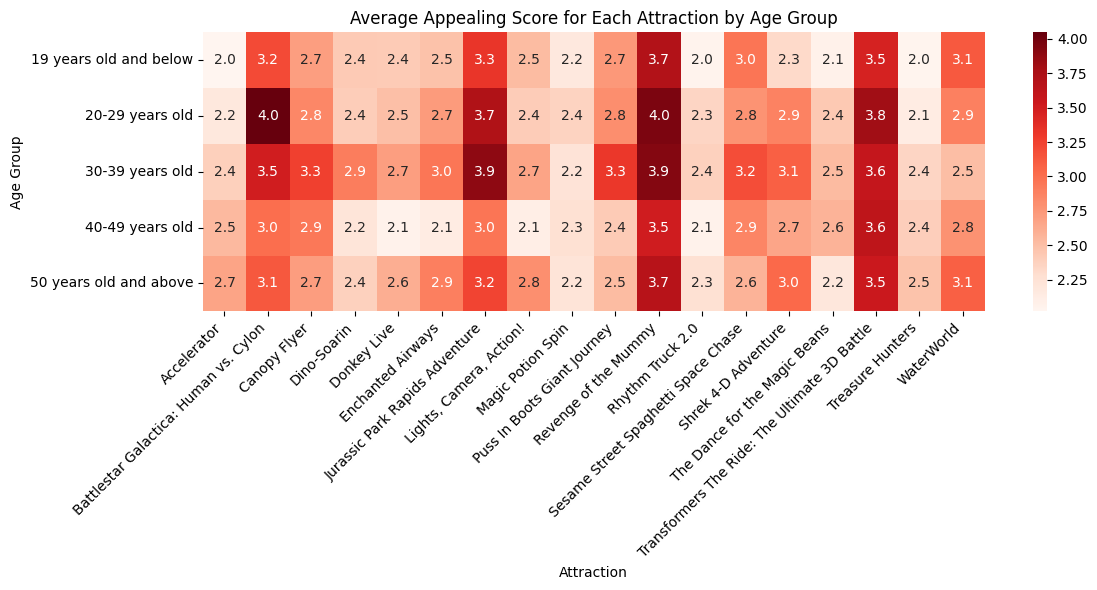

In [ ]:
appealing_cols = ['Attractions appeal [Battlestar Galactica: Human vs. Cylon]',
                  'Attractions appeal [Transformers The Ride: The Ultimate 3D Battle]',
                  'Attractions appeal [Revenge of the Mummy]',
                  'Attractions appeal [Jurassic Park Rapids Adventure]',
                  'Attractions appeal [Sesame Street Spaghetti Space Chase]',
                  'Attractions appeal [Canopy Flyer]',
                  "Attractions appeal [Puss In Boots' Giant Journey]",
                  "Attractions appeal [Dino-Soarin']",
                  'Attractions appeal [Enchanted Airways]',
                  'Attractions appeal [Treasure Hunters (Vintage Car Attraction)]',
                  'Attractions appeal [Accelerator (Spinning Ride)]',
                  'Attractions appeal [Magic Potion Spin (Far Far Away Ferris Wheel)]',
                  'Attractions appeal [Lights, Camera, Action!]',
                  'Attractions appeal [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]',
                  'Attractions appeal [Shrek 4-D Adventure]',
                  'Attractions appeal [Donkey Live]',
                  'Attractions appeal [Rhythm Truck 2.0]',
                  'Attractions appeal [WaterWorld]']

# Melt the DataFrame to have Age, Attraction, and Appealing Score in separate columns
melted_sd = pd.melt(df_eda_syn, id_vars=['Age'], value_vars=appealing_cols,
                    var_name='Attraction', value_name='Appealing Score')

# Group by Age and Attraction, and calculate the average appealing score
average_appealing_by_age_attraction = melted_sd.groupby(['Age', 'Attraction'])['Appealing Score'].mean().unstack()

# Map age group labels to numerical values
age_group_mapping = {
    1: '19 years old and below',
    2: '20-29 years old',
    3: '30-39 years old',
    4: '40-49 years old',
    5: '50 years old and above'
}

attraction_name_mapping = {
    'Attractions appeal [Battlestar Galactica: Human vs. Cylon]': 'Battlestar Galactica: Human vs. Cylon',
    'Attractions appeal [Transformers The Ride: The Ultimate 3D Battle]': 'Transformers The Ride: The Ultimate 3D Battle',
    'Attractions appeal [Revenge of the Mummy]': 'Revenge of the Mummy',
    'Attractions appeal [Jurassic Park Rapids Adventure]': 'Jurassic Park Rapids Adventure',
    'Attractions appeal [Sesame Street Spaghetti Space Chase]': 'Sesame Street Spaghetti Space Chase',
    'Attractions appeal [Canopy Flyer]': 'Canopy Flyer',
    "Attractions appeal [Puss In Boots' Giant Journey]": 'Puss In Boots Giant Journey',
    "Attractions appeal [Dino-Soarin']": 'Dino-Soarin',
    'Attractions appeal [Enchanted Airways]': 'Enchanted Airways',
    'Attractions appeal [Treasure Hunters (Vintage Car Attraction)]': 'Treasure Hunters',
    'Attractions appeal [Accelerator (Spinning Ride)]': 'Accelerator',
    'Attractions appeal [Magic Potion Spin (Far Far Away Ferris Wheel)]': 'Magic Potion Spin',
    'Attractions appeal [Lights, Camera, Action!]': 'Lights, Camera, Action!',
    'Attractions appeal [The Dance for the Magic Beans (Interactive show with Puss in Boots and Kitty Softpaws)]': 'The Dance for the Magic Beans',
    'Attractions appeal [Shrek 4-D Adventure]': 'Shrek 4-D Adventure',
    'Attractions appeal [Donkey Live]': 'Donkey Live',
    'Attractions appeal [Rhythm Truck 2.0]': 'Rhythm Truck 2.0',
    'Attractions appeal [WaterWorld]': 'WaterWorld'
}

average_appealing_by_age_attraction = average_appealing_by_age_attraction.rename(columns=attraction_name_mapping, index=age_group_mapping)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(average_appealing_by_age_attraction, annot=True, cmap='Reds', fmt=".1f")  # fmt=".1f" for average likelihood
plt.title('Average Appealing Score for Each Attraction by Age Group')
plt.xlabel('Attraction')
plt.ylabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Heatmap of Experience Rating Aspects, by Age Group

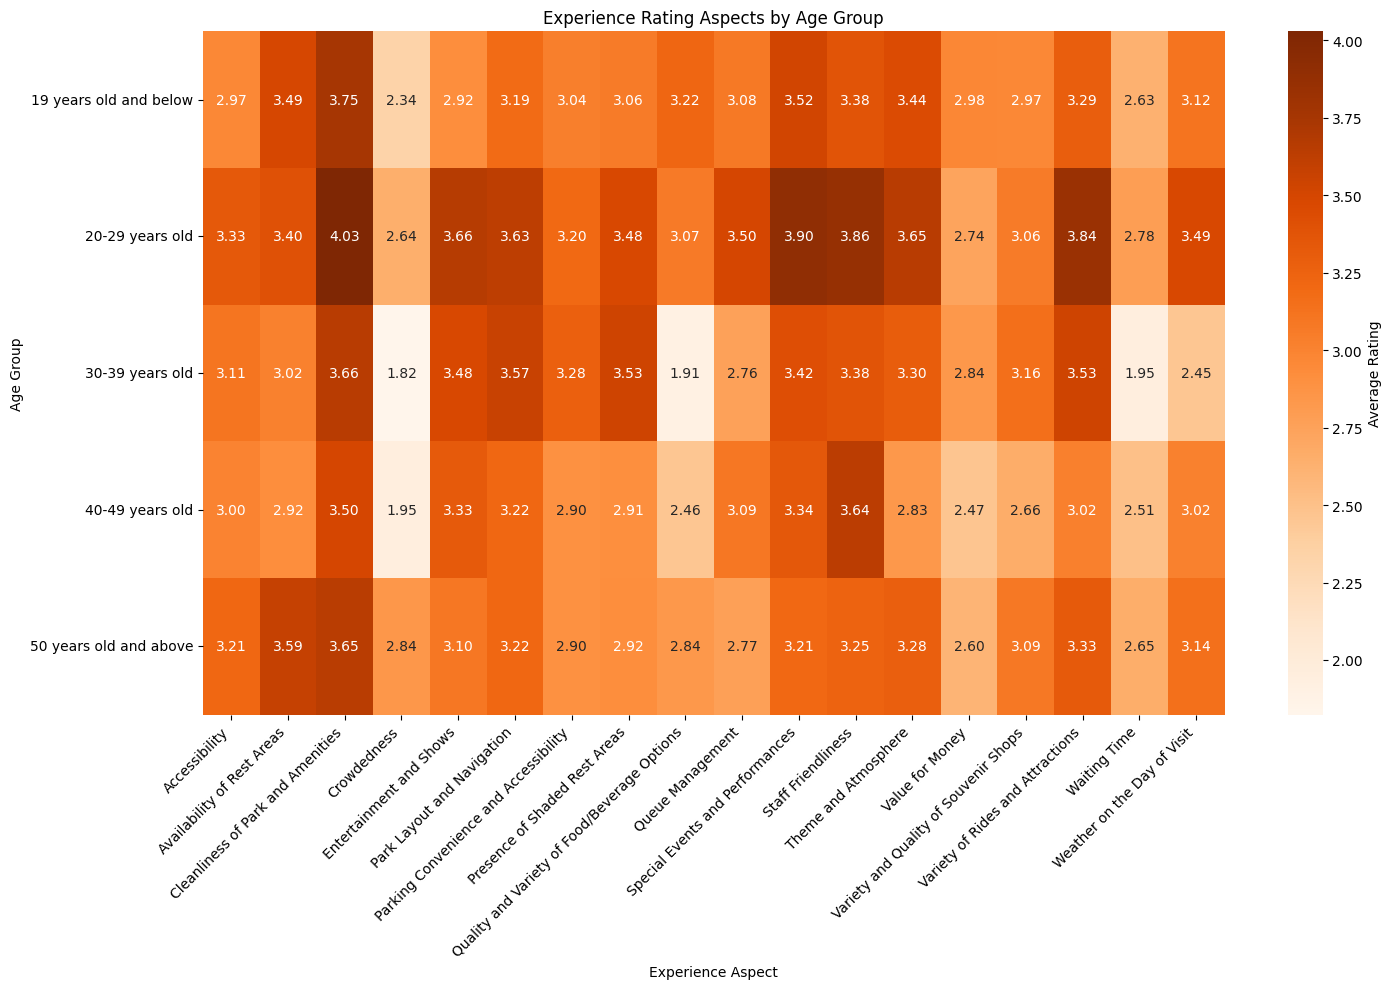

In [ ]:
experience_rating = ['USS experience rating [Variety of Rides and Attractions]',
                     'USS experience rating [Entertainment and Shows (e.g. Rollercoasters, WaterWorld Performance)]',
                     'USS experience rating [Waiting Time]',
                     'USS experience rating [Cleanliness of Park and Amenities]',
                     'USS experience rating [Staff Friendliness]',
                     'USS experience rating [Availability of Rest Areas]',
                     'USS experience rating [Quality and Variety of Food/Beverage Options]',
                     'USS experience rating [Crowdedness]',
                     'USS experience rating [Value for Money (Entrance Fee, Food, etc)]',
                     'USS experience rating [Variety and Quality of Souvenir Shops]',
                     'USS experience rating [Theme and Atmosphere]',
                     'USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]',
                     'USS experience rating [Presence of Shaded Rest Areas]',
                     'USS experience rating [Weather on the Day of Visit]',
                     'USS experience rating [Park Layout and Navigation]',
                     'USS experience rating [Accessibility (Wheelchair friendly, etc)]',
                     'USS experience rating [Parking Convenience and Accessibility]',
                     'USS experience rating [Queue Management]']


melted_sd = pd.melt(df_eda_syn, id_vars=['Age'], value_vars=experience_rating,
                    var_name='Experience Aspect', value_name='Rating')

average_rating_by_age_aspect = melted_sd.groupby(['Age', 'Experience Aspect'])['Rating'].mean().unstack()

# Map age group labels to numerical values
age_group_mapping = {
    1: '19 years old and below',
    2: '20-29 years old',
    3: '30-39 years old',
    4: '40-49 years old',
    5: '50 years old and above'
}

exp_mapping = {
    'USS experience rating [Variety of Rides and Attractions]': 'Variety of Rides and Attractions',
    'USS experience rating [Entertainment and Shows (e.g. Rollercoasters, WaterWorld Performance)]': 'Entertainment and Shows',
    'USS experience rating [Waiting Time]': 'Waiting Time',
    'USS experience rating [Cleanliness of Park and Amenities]': 'Cleanliness of Park and Amenities',
    'USS experience rating [Staff Friendliness]': 'Staff Friendliness',
    'USS experience rating [Availability of Rest Areas]': 'Availability of Rest Areas',
    'USS experience rating [Quality and Variety of Food/Beverage Options]': 'Quality and Variety of Food/Beverage Options',
    'USS experience rating [Crowdedness]': 'Crowdedness',
    'USS experience rating [Value for Money (Entrance Fee, Food, etc)]': 'Value for Money',
    'USS experience rating [Variety and Quality of Souvenir Shops]': 'Variety and Quality of Souvenir Shops',
    'USS experience rating [Theme and Atmosphere]': 'Theme and Atmosphere',
    'USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]': 'Special Events and Performances',
    'USS experience rating [Presence of Shaded Rest Areas]': 'Presence of Shaded Rest Areas',
    'USS experience rating [Weather on the Day of Visit]': 'Weather on the Day of Visit',
    'USS experience rating [Park Layout and Navigation]': 'Park Layout and Navigation',
    'USS experience rating [Accessibility (Wheelchair friendly, etc)]': 'Accessibility',
    'USS experience rating [Parking Convenience and Accessibility]': 'Parking Convenience and Accessibility',
    'USS experience rating [Queue Management]': 'Queue Management'
}
average_rating_by_age_aspect = average_rating_by_age_aspect.rename(columns = exp_mapping, index=age_group_mapping)

plt.figure(figsize=(15, 10))
sns.heatmap(average_rating_by_age_aspect, annot=True, cmap='Oranges', fmt=".2f", cbar_kws={'label': 'Average Rating'})
plt.title('Experience Rating Aspects by Age Group')
plt.xlabel('Experience Aspect')
plt.ylabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()






# Identifying Pain Points and Suggesting Improvements

## Heatmap of Influence of Factors on Improving Past Visits, by Age Group

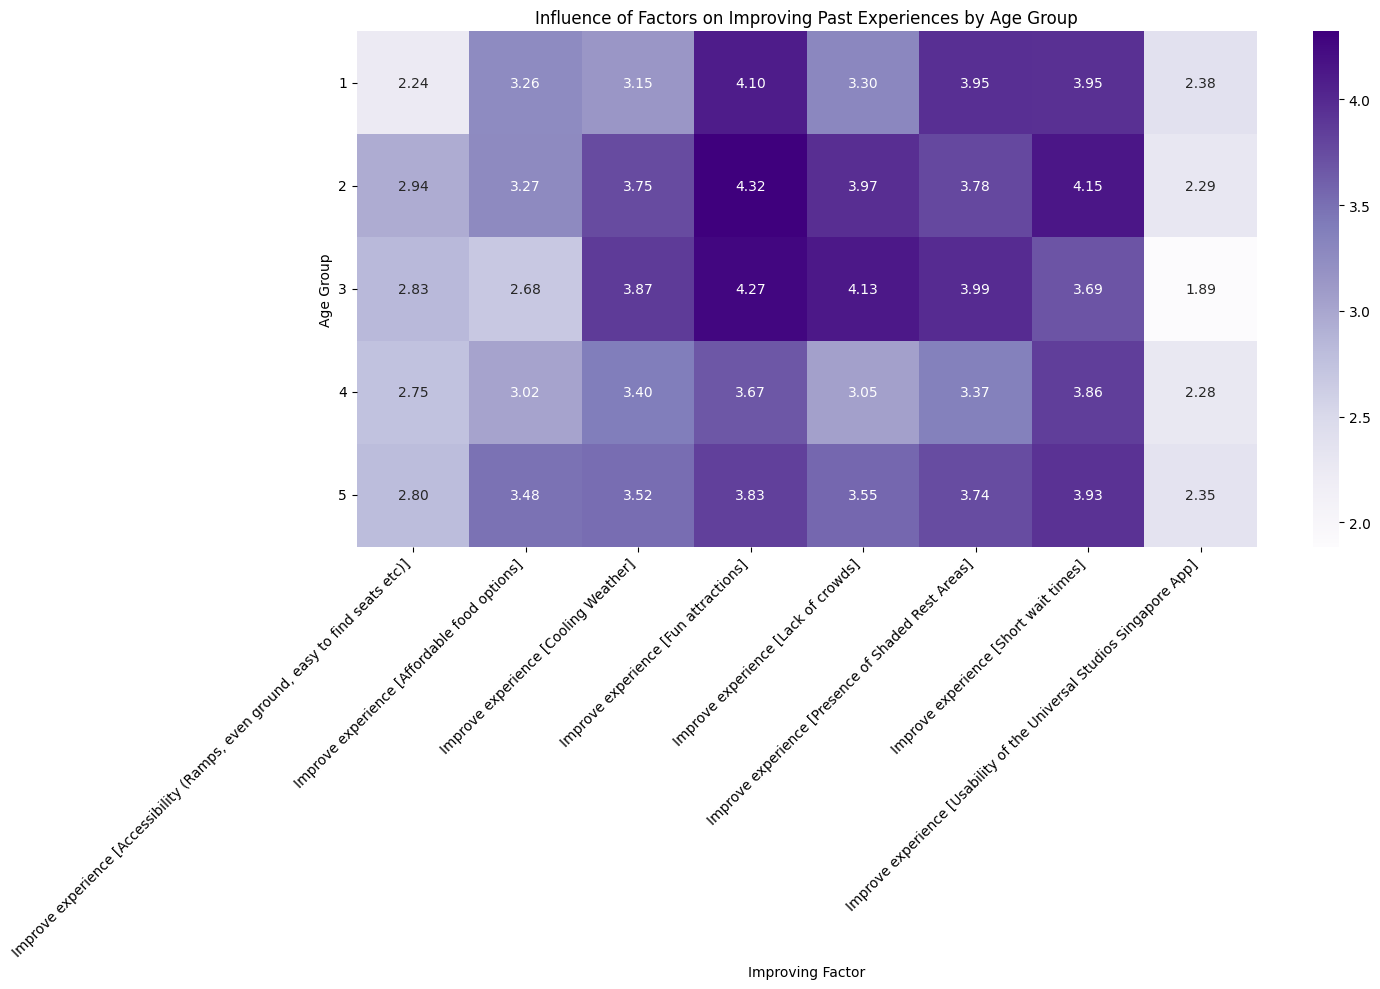

In [ ]:
improve = [ 'Improve experience [Short wait times]',
 'Improve experience [Lack of crowds]',
 'Improve experience [Fun attractions]',
 'Improve experience [Affordable food options]',
 'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]',
 'Improve experience [Cooling Weather]',
 'Improve experience [Presence of Shaded Rest Areas]',
 'Improve experience [Usability of the Universal Studios Singapore App]'
]


melted_sd = pd.melt(df_eda_syn, id_vars=['Age'], value_vars=improve,
                    var_name='Improve Experience', value_name='Rating')

imp_by_age = melted_sd.groupby(['Age', 'Improve Experience'])['Rating'].mean().unstack()

# Map age group labels to numerical values
age_group_mapping = {
    1: '19 years old and below',
    2: '20-29 years old',
    3: '30-39 years old',
    4: '40-49 years old',
    5: '50 years old and above'
}

imp = {
     'Improve experience [Short wait times]': 'Short wait times',
     'Improve experience [Lack of crowds]': 'Lack of crowds',
     'Improve experience [Fun attractions]': 'Fun attractions',
     'Improve experience [Affordable food options]': 'Affordable food options',
     'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]': 'Accessibility',
     'Improve experience [Cooling Weather]': 'Cooling Weather',
     'Improve experience [Presence of Shaded Rest Areas]': 'Presence of Shaded Rest Areas',
     'Improve experience [Usability of the Universal Studios Singapore App]': 'Usability of the Universal Studios Singapore App'
}

improve_by_age_aspect = imp_by_age.rename(columns = imp, index=age_group_mapping)

plt.figure(figsize=(15, 10))
sns.heatmap(imp_by_age, annot=True, cmap='Purples', fmt=".2f")
plt.title('Influence of Factors on Improving Past Experiences by Age Group')
plt.xlabel("Improving Factor")
plt.ylabel("Age Group")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Wet Weather

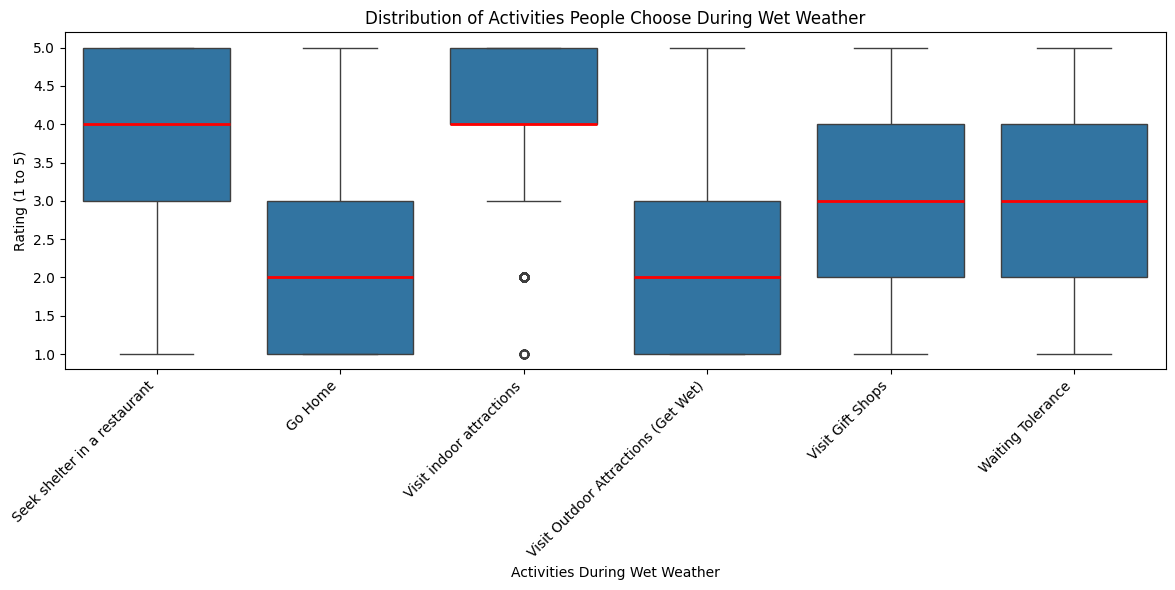

In [ ]:
wet_weather_cols = [
     'Wet weather [Seek shelter in a restaurant]',
 'Wet weather [Go home]',
 'Wet weather [Visit indoor attractions]',
 "Wet weather [Visit outdoor attractions (I don't mind getting wet)]",
 'Wet weather [Visit gift shops/retail areas]',
 'Wet weather waiting tolerance'
]

melted_wet_weather = pd.melt(df_eda_syn, value_vars=wet_weather_cols,
                              var_name='Activity', value_name='Rating')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='Rating', data=melted_wet_weather, medianprops={'color': 'red', 'linewidth': 2})

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Activities During Wet Weather')
plt.ylabel('Rating (1 to 5)')
plt.title('Distribution of Activities People Choose During Wet Weather')

custom_labels = [
    'Seek shelter in a restaurant',
    'Go Home',
    'Visit indoor attractions',
    'Visit Outdoor Attractions (Get Wet)',
    'Visit Gift Shops',
    'Waiting Tolerance'
]
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

plt.tight_layout()

# Show the plot
plt.show()

## Visitors’ Considerations to Planning their Route


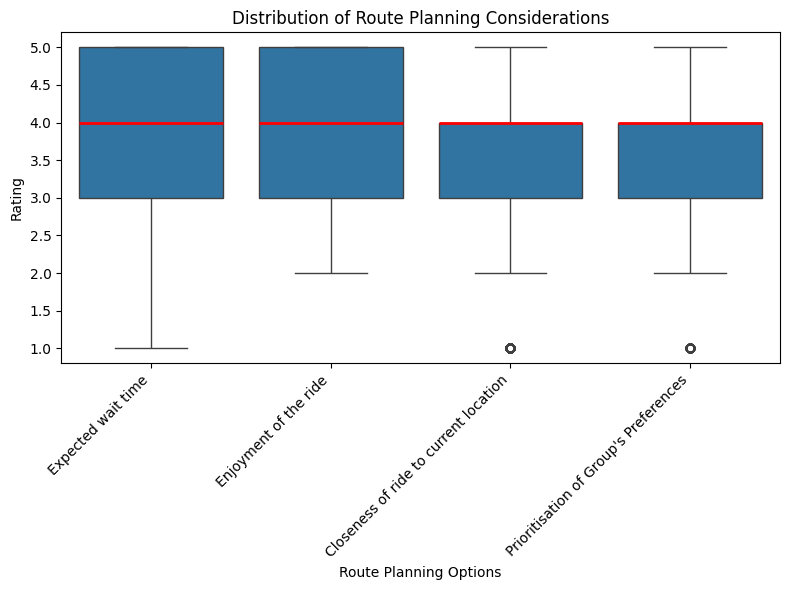

In [ ]:
plan_col = [
'Planning route [Expected wait time]',
 'Planning route [Enjoyment of the ride]',
 'Planning route [Closeness of ride to current location]',
 "Planning route [Prioritisation of Group's Preferences (e.g. going with your family and choosing to go to the rides that your younger siblings prefer)]",
]

melted_plan = pd.melt(df_eda_syn, value_vars=plan_col,
                              var_name='Route Planning Options', value_name='Rating')

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Route Planning Options', y='Rating', data=melted_plan, medianprops={'color': 'red', 'linewidth': 2})

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Route Planning Options')
plt.ylabel('Rating')
plt.title('Distribution of Route Planning Considerations')

custom_labels = [
    'Expected wait time',
    'Enjoyment of the ride',
    'Closeness of ride to current location',
    "Prioritisation of Group's Preferences"
]
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)

plt.tight_layout()

# Show the plot
plt.show()